In [20]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot adalah Basis R visualisasi paket yang menyedaiakan atau memberikan grafis yang baik dengan level abstraksi yang tinggi


# Basic Data Sciene and Machine Learning Pipeline
## OSEMN Pipeline
- O - Obstaining our data
- S - Scrubbing / Cleaning our data
- E - Exploring / Visualizing our data will allow us to find pattern and trends
- M - Modeling our data will give us our predictive power as wizard
- N - Interpreting our data


In [21]:
# Load dataset diabetes.csv
data_diabet = pd.read_csv('diabetes.csv')

data_diabet.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA dan Analisis Statistik

In [22]:
## gives information about the data types,columns, null value counts, memory usage etc
## function reference : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
data_diabet.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
## basic statistic details about the data (note only numerical columns would be displayed here unless parameter include="all")
## for reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe
data_diabet.describe()

## Also see :
##to return columns of a specific dtype: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html#pandas.DataFrame.select_dtypes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
data_diabet.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Pertanyaan dari kesimpulan
Bisakah minimum value dari kolom diatas menjadi 0 ? pada kolom tersebut, sebuah nilai 0 tidak masuk akal dan itu menandakan adanya missing value
Berikut beberapa kolom atau variable yang memiliki invalid zero value :
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI
Lebih baik untuk mengganti zero dengan nan sesudah menghitung mereka, menjadi lebih mudah dan nilai 0 dapat digantikan dengan value yang sesuai atau cocok

In [25]:
data_diabet_copy = data_diabet.copy(deep=True)
data_diabet_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data_diabet_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
#Showing the count of Nans
print(data_diabet_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


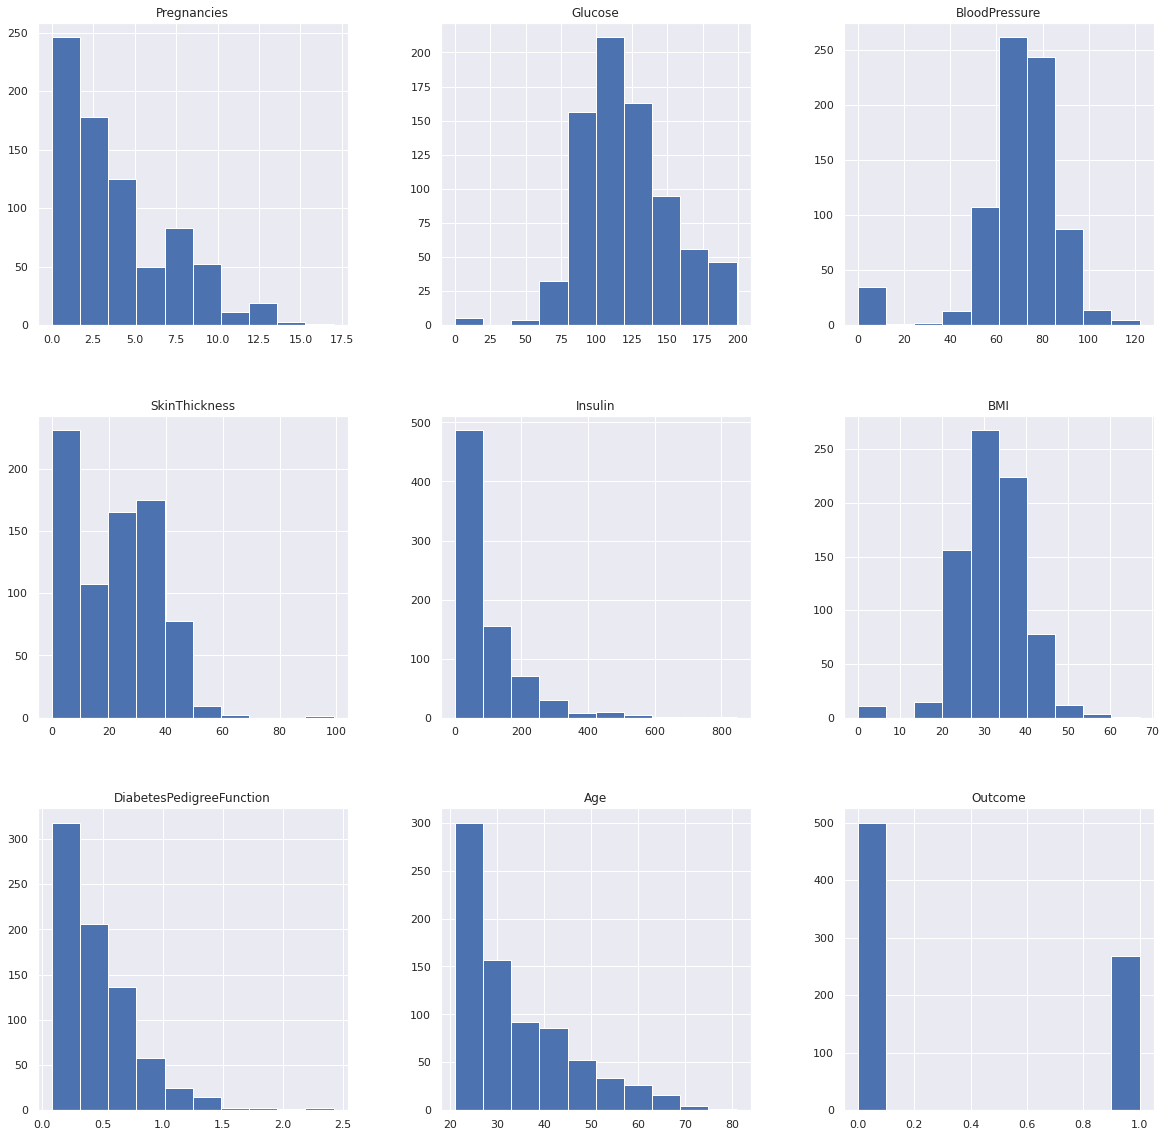

In [26]:
p = data_diabet.hist(figsize = (20,20))

In [27]:
data_diabet_copy['Glucose'].fillna(data_diabet_copy['Glucose'].mean(), inplace=True)
data_diabet_copy['BloodPressure'].fillna(data_diabet_copy['BloodPressure'].mean(), inplace=True)
data_diabet_copy['SkinThickness'].fillna(data_diabet_copy['SkinThickness'].median(), inplace=True)
data_diabet_copy['Insulin'].fillna(data_diabet_copy['Insulin'].median(), inplace=True)
data_diabet_copy['BMI'].fillna(data_diabet_copy['BMI'].median(), inplace=True)

## Plotting sesudah Nan Removal

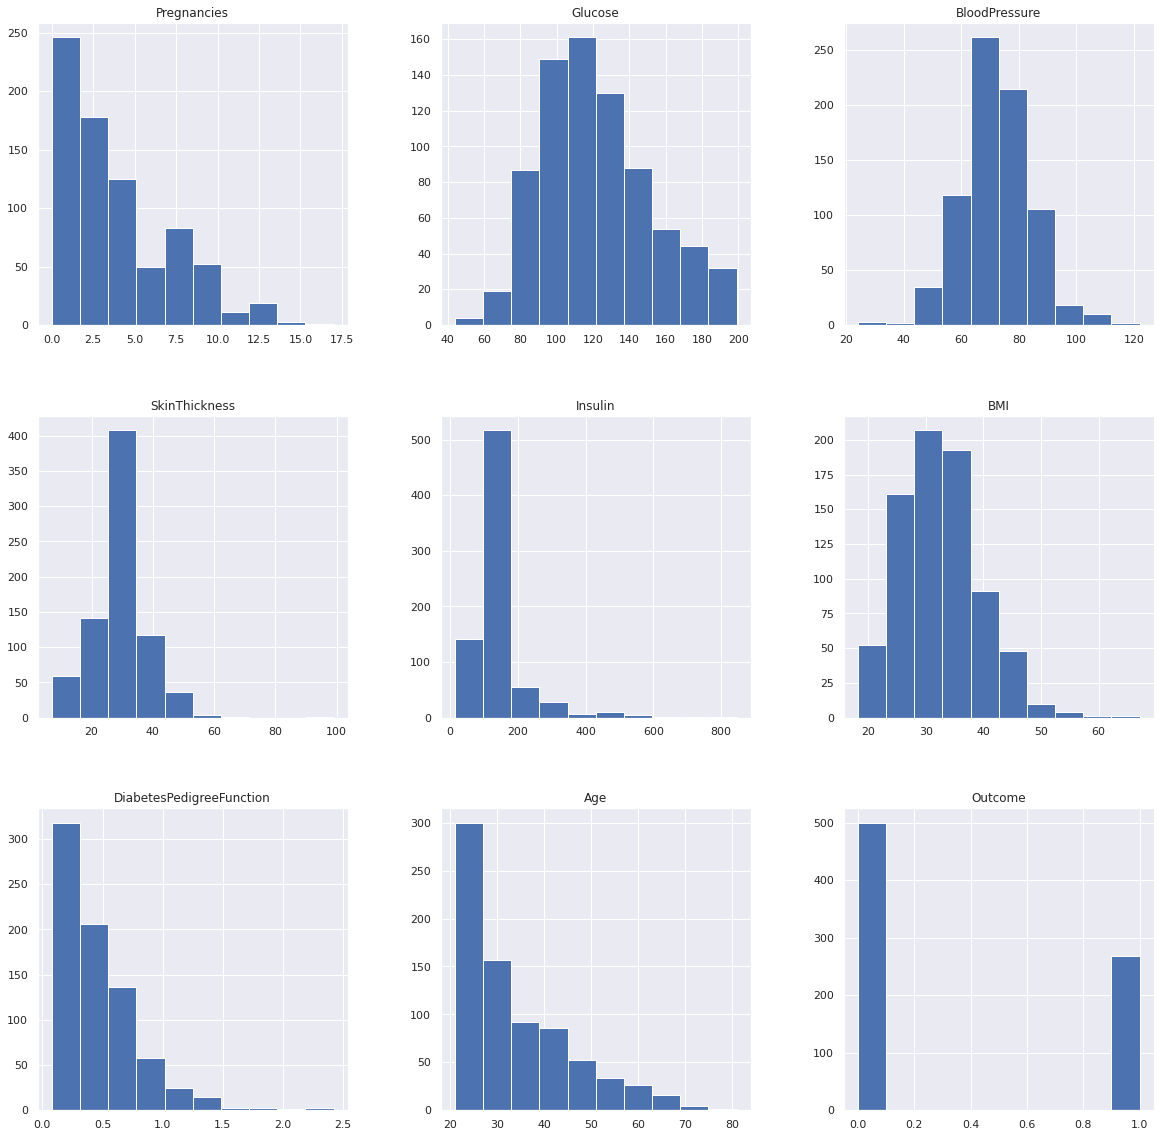

In [28]:
p = data_diabet_copy.hist(figsize = (20,20))

## Skewness
A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.


Referensi :
to learn more about skewness
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/

In [29]:
## Observasi bentuk/shape dari data
data_diabet.shape

(768, 9)

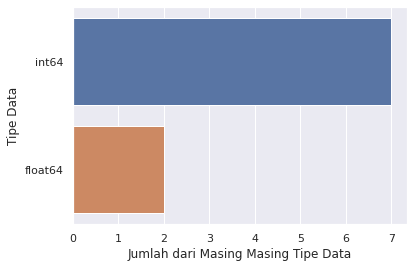

In [30]:
## Tipe data analisis
#plt.figure(figsize=(5,5))
#sns.set(font_scale=2)
sns.countplot(y=data_diabet.dtypes ,data=data_diabet)
plt.xlabel("Jumlah dari Masing Masing Tipe Data")
plt.ylabel("Tipe Data")
plt.show()

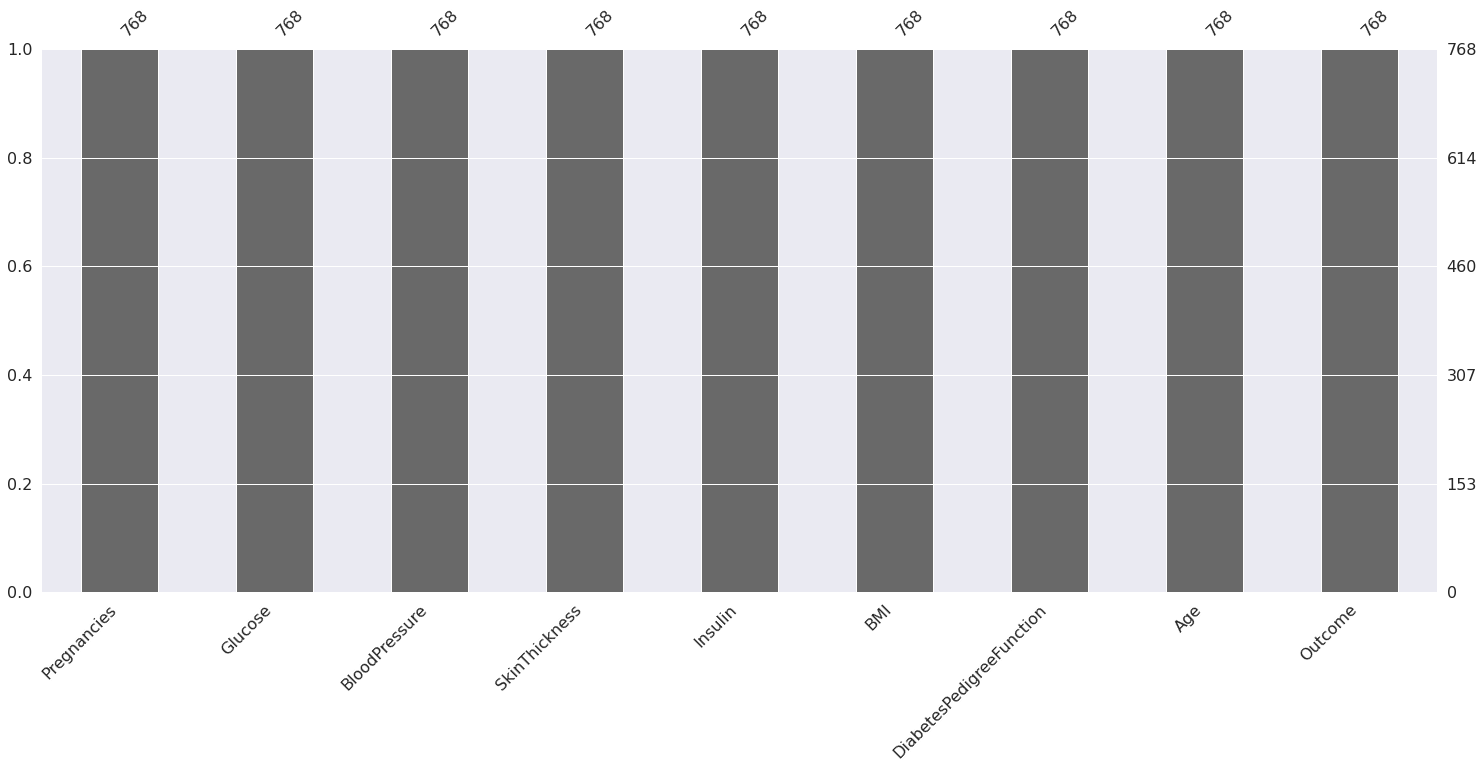

In [31]:
# null count analisis
import missingno as msno
p = msno.bar(data_diabet)

0    500
1    268
Name: Outcome, dtype: int64


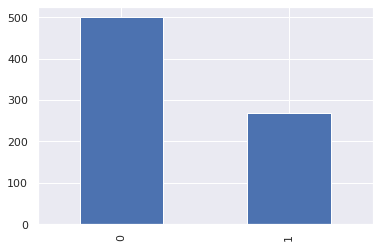

In [32]:
## Mengecek keseimbangan dari data dengan memplott jumlah keluaran dari value mereka
color_w = {1: "#0392cf",
           2: "#7bc042"}
colors = data_diabet["Outcome"].map(lambda x: color_w.get(x + 1))
print(data_diabet.Outcome.value_counts())
p = data_diabet.Outcome.value_counts().plot(kind="bar")

>Grafik diatas menunjukan bahwa data bias terhadap titik data yang memiliki nilai hasil sebagai 0 yang berarti diabetes sebenarnya tidak ada. Jumlah non-penderita diabetes hampir dua kali lipat jumlah pasien diabtes

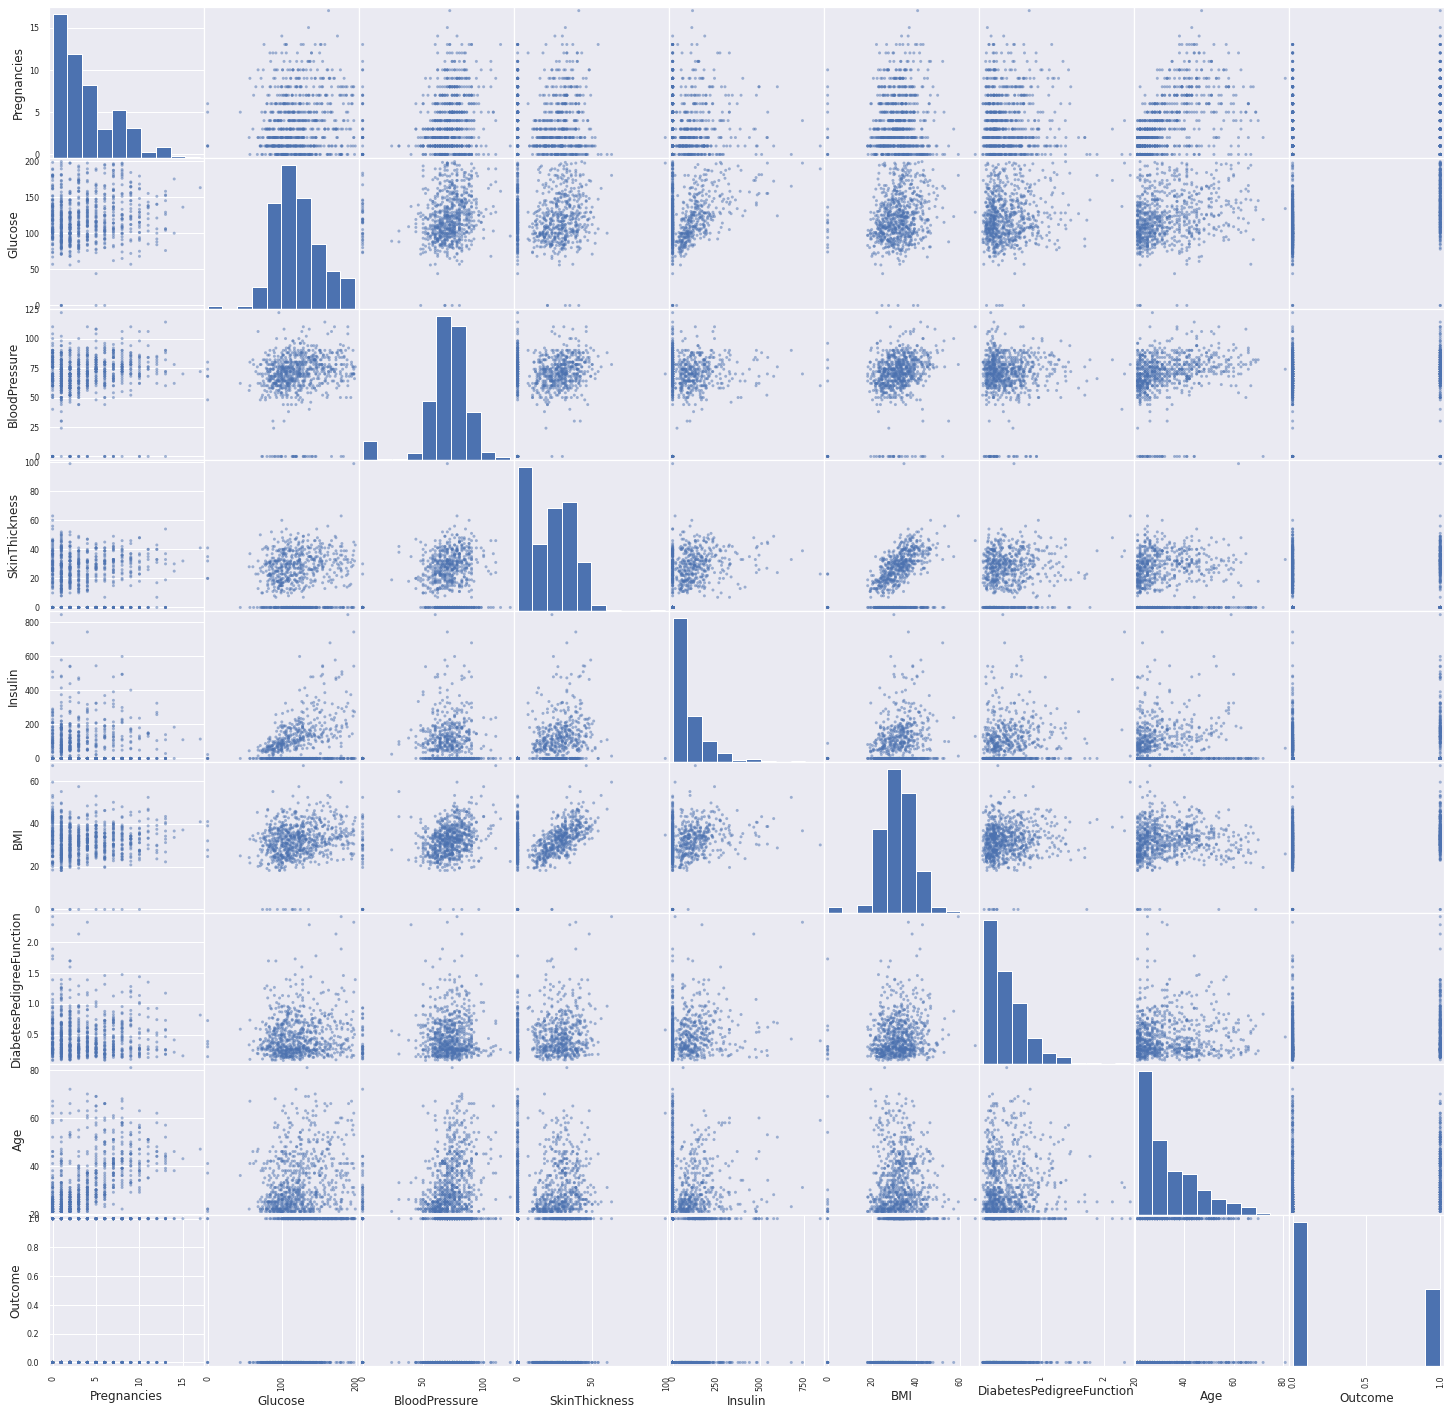

In [34]:
# Scatter Matrix dari uncleaned data
from pandas.plotting import scatter_matrix
p = scatter_matrix(data_diabet, figsize=(25,25))


Plot pasangan dibangun di atas dua gambar dasar, histogram dan plot pencar. Histogram pada diagonal memungkinkan kita untuk melihat distribusi satu variabel sementara plot pencar pada segitiga atas dan bawah menunjukkan hubungan (atau ketiadaan) antara dua variabel.
Referensi :     
https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

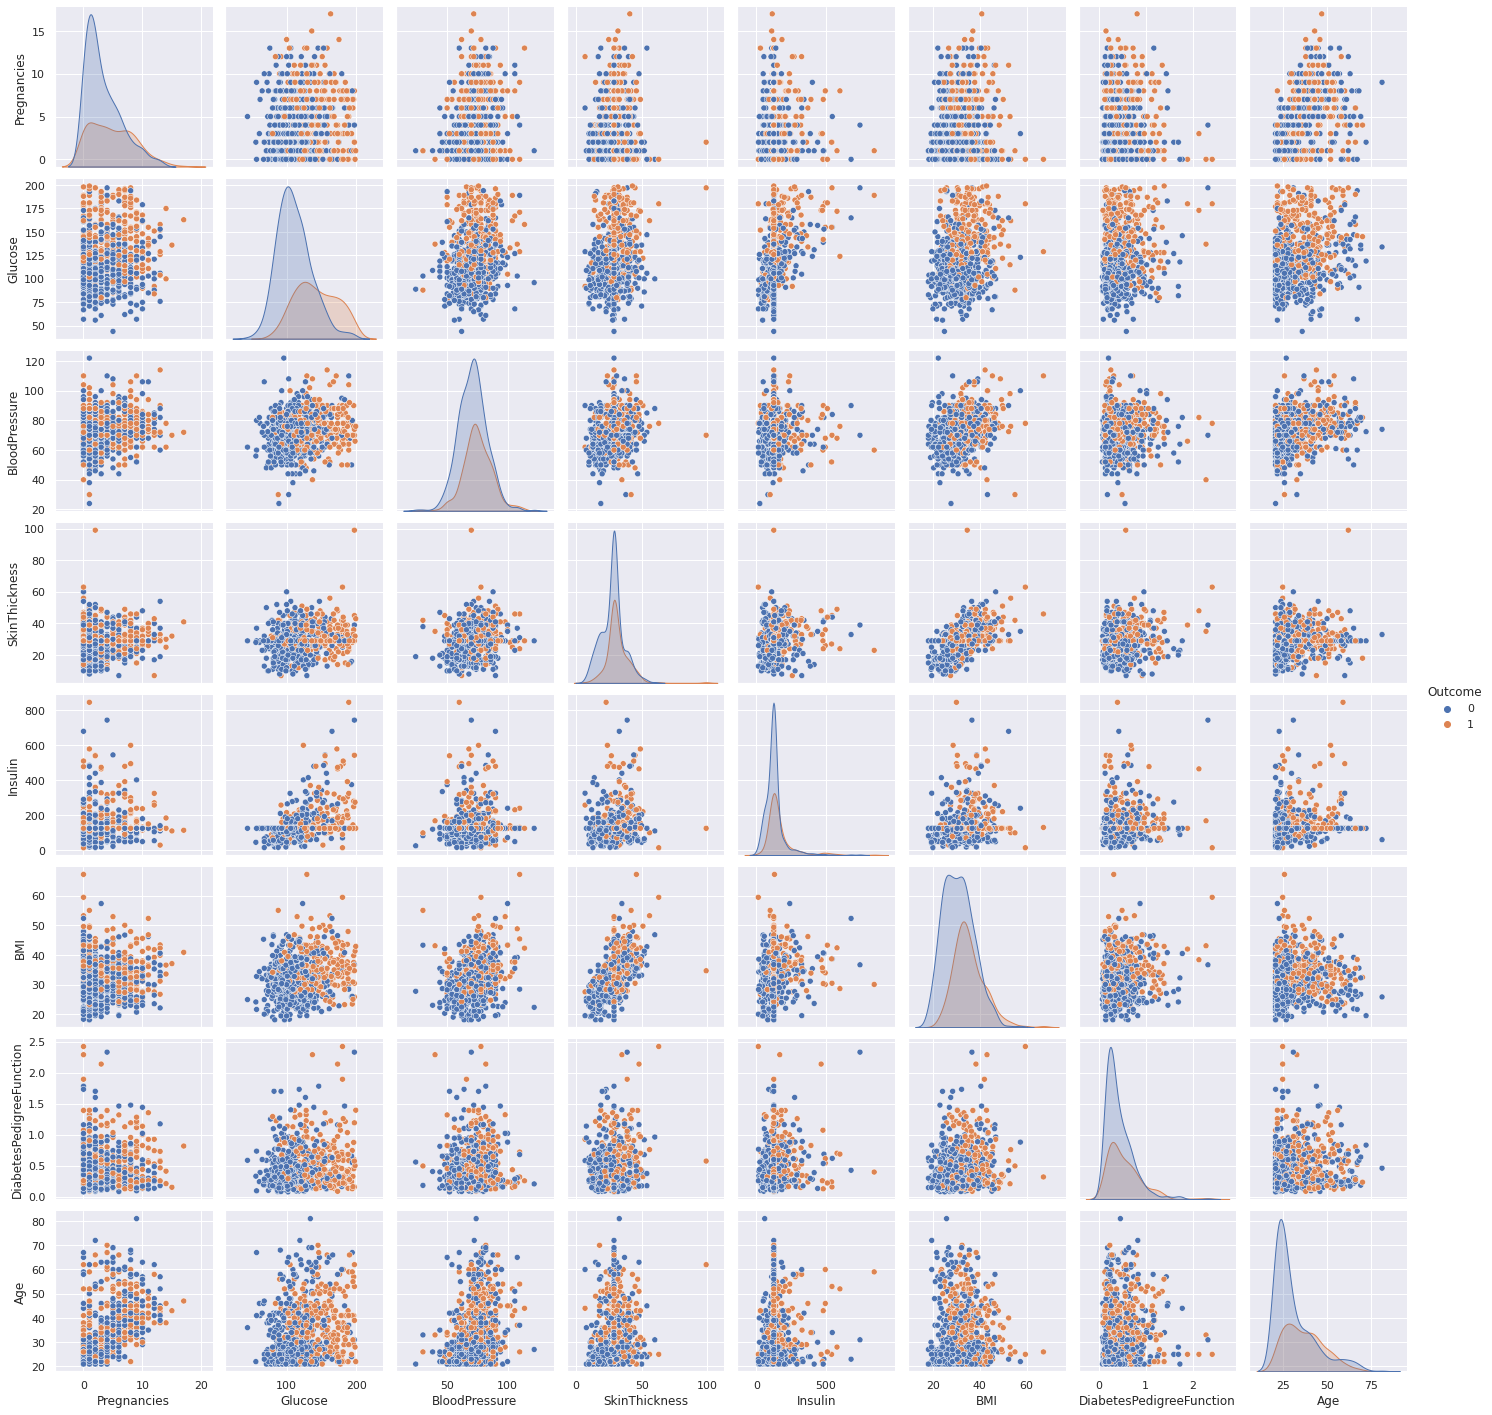

In [35]:
# Pair Plot untuk data clean
p = sns.pairplot(data_diabet_copy, hue = 'Outcome')

> Koefisien Korelasi Pearson: membantu Anda mengetahui hubungan antara dua besaran. Ini memberi Anda ukuran kekuatan hubungan antara dua variabel. Nilai Koefisien Korelasi Pearson dapat berkisar antara -1 hingga +1. 1 berarti sangat berkorelasi dan 0 berarti tidak ada korelasi.

>Peta panas adalah representasi informasi dua dimensi dengan bantuan warna. Peta panas dapat membantu pengguna memvisualisasikan informasi sederhana atau kompleks.

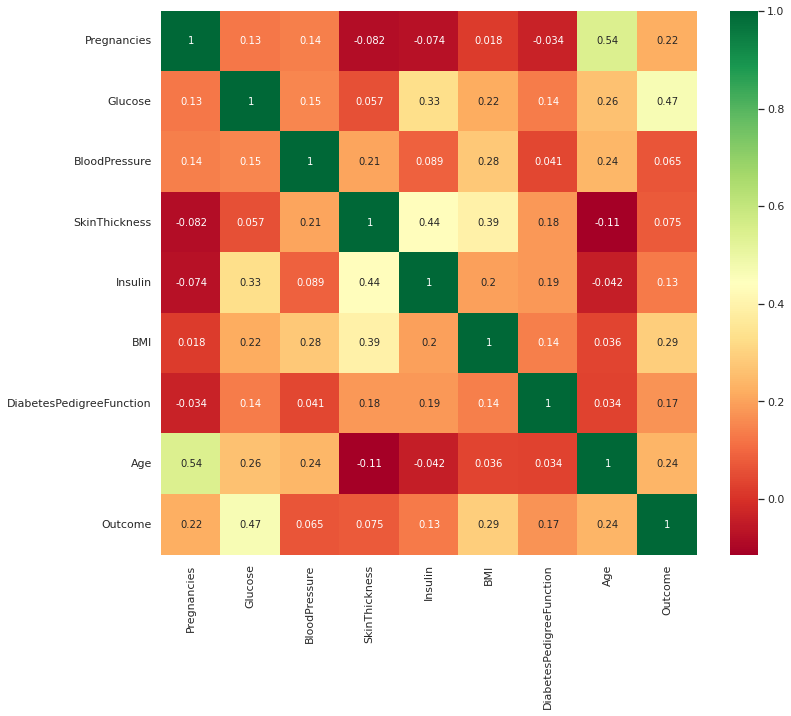

In [36]:
# Heatmap untuk unclean data
plt.figure(figsize=(12,10)) #set ukuran dari figure mjd 12 hingga 10
p=sns.heatmap(data_diabet.corr(), annot=True, cmap='RdYlGn')

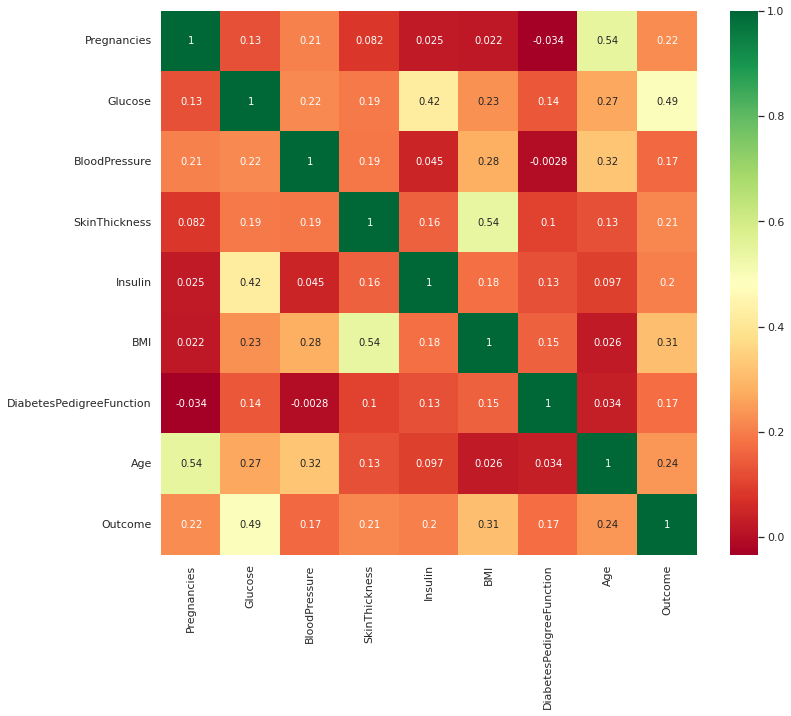

In [37]:
# Heatmap untuk data clean
plt.figure(figsize=(12,10))
p=sns.heatmap(data_diabet_copy.corr(), annot=True,cmap="RdYlGn")

## Scalling Data
data Z is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula:
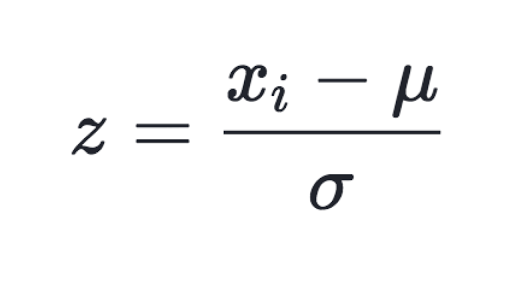

In [39]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data_diabet_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [40]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [41]:
# X = data_diabet.drop("Outcome", axis = 1)
y = data_diabet_copy.Outcome

## Mengapa Perlu melakukan Scalling data untuk KNN (K Neares Neighbour) ?
> selalu disarankan untuk membawa semua fitur ke skala yang sama untuk menerapkan algoritma berbasis jarak seperti KNN.

Mari kita lihat contoh penghitungan jarak menggunakan dua fitur yang besaran/rentangnya sangat bervariasi.

Euclidean Distance = [(100000–80000)^2 + (30–25)^2]^(1/2)

Kita dapat membayangkan bagaimana fitur dengan jangkauan yang lebih besar dengan menaungi atau mengurangi fitur yang lebih kecil sepenuhnya dan ini akan berdampak pada kinerja semua model berbasis jarak karena akan memberikan bobot yang lebih tinggi untuk variabel yang memiliki magnitudo lebih tinggi



### Test Train Split dan Cross Validation methods

***Train Test Split :*** Untuk memiliki titik data yang tidak diketahui untuk menguji data daripada menguji data dengan titik yang sama dengan model yang dilatih. Ini membantu menangkap kinerja model jauh lebih baik
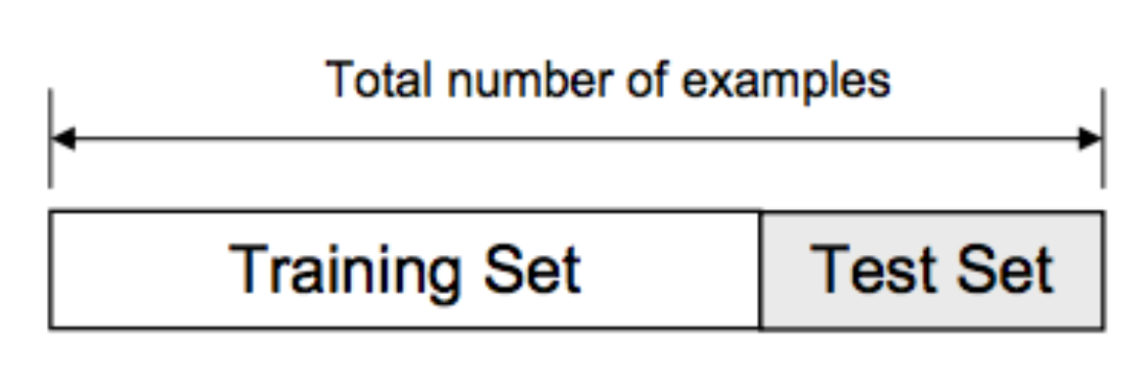

***Cross validation :*** Ketika model dipecah menjadi pelatihan dan pengujian, ada kemungkinan bahwa jenis titik data tertendu dapat seluruhnya menjadi bagian pelatihan atau pengujian. Ini akan menyebabkan model berkinerja buruk. Oleh karena itu masalah over-fitting dan underfitting dapat dihindari dengan baik dengan teknik Cross Validation atau Validasi Silang
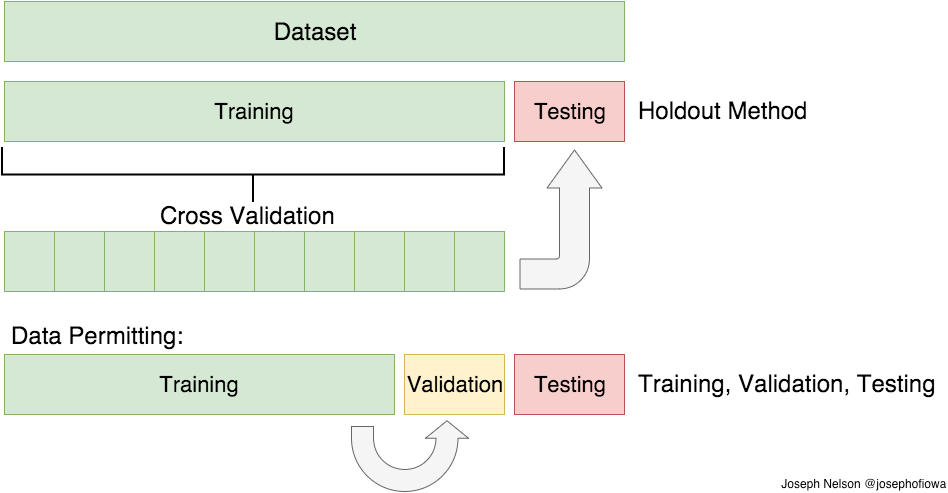

***Stratify :*** Stratifikasi parameter membuat pemisahan sehingga proporsi nilai dalam sampel yang dihasilkan akan sama dengan proporsi nilai yang diberikan pada parameter stratifikasi.

Misalnya, jika variabel y adalah variabel kategorikal biner dengan nilai 0 dan 1 dan terdapat 25% nol dan 75% satu, stratify=y akan memastikan bahwa pembagian acak Anda memiliki 25% nol dan 75% nol.
Referensi :    
https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [42]:
#Importing train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=42, stratify=y)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):
  knn = KNeighborsClassifier(i)
  knn.fit(X_train,y_train)

  train_scores.append(knn.score(X_train, y_train))
  test_scores.append(knn.score(X_test, y_test))

In [45]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [46]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.5625 % and k = [11]


## Result Visualisation

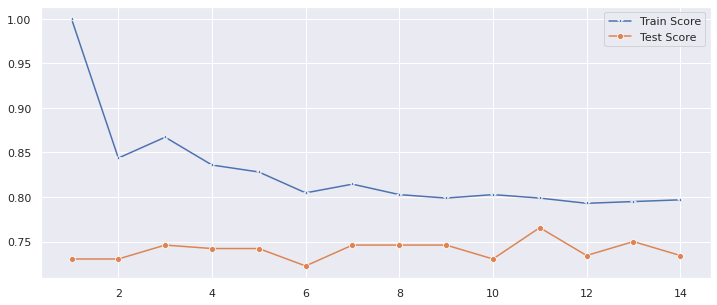

In [47]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15), train_scores, marker='*', label='Train Score')
p = sns.lineplot(range(1,15), test_scores, marker='o', label='Test Score')


Hasil terbaik terlihat pada k = 11 digunakan untuk final model

In [48]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.765625

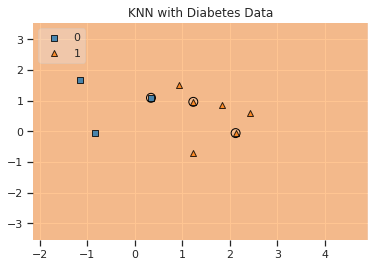

In [49]:
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)
# Adding axes annotations
#plt.xlabel('Sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

# Analisis Performasi Model
## 1. Confsuion Matrix
Adalah teknik yang digunakan untuk meringkas kinerja algoritma klasifikasi yaitu memiliki keluaran biner.
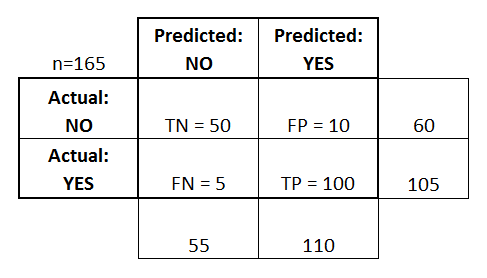

=============================
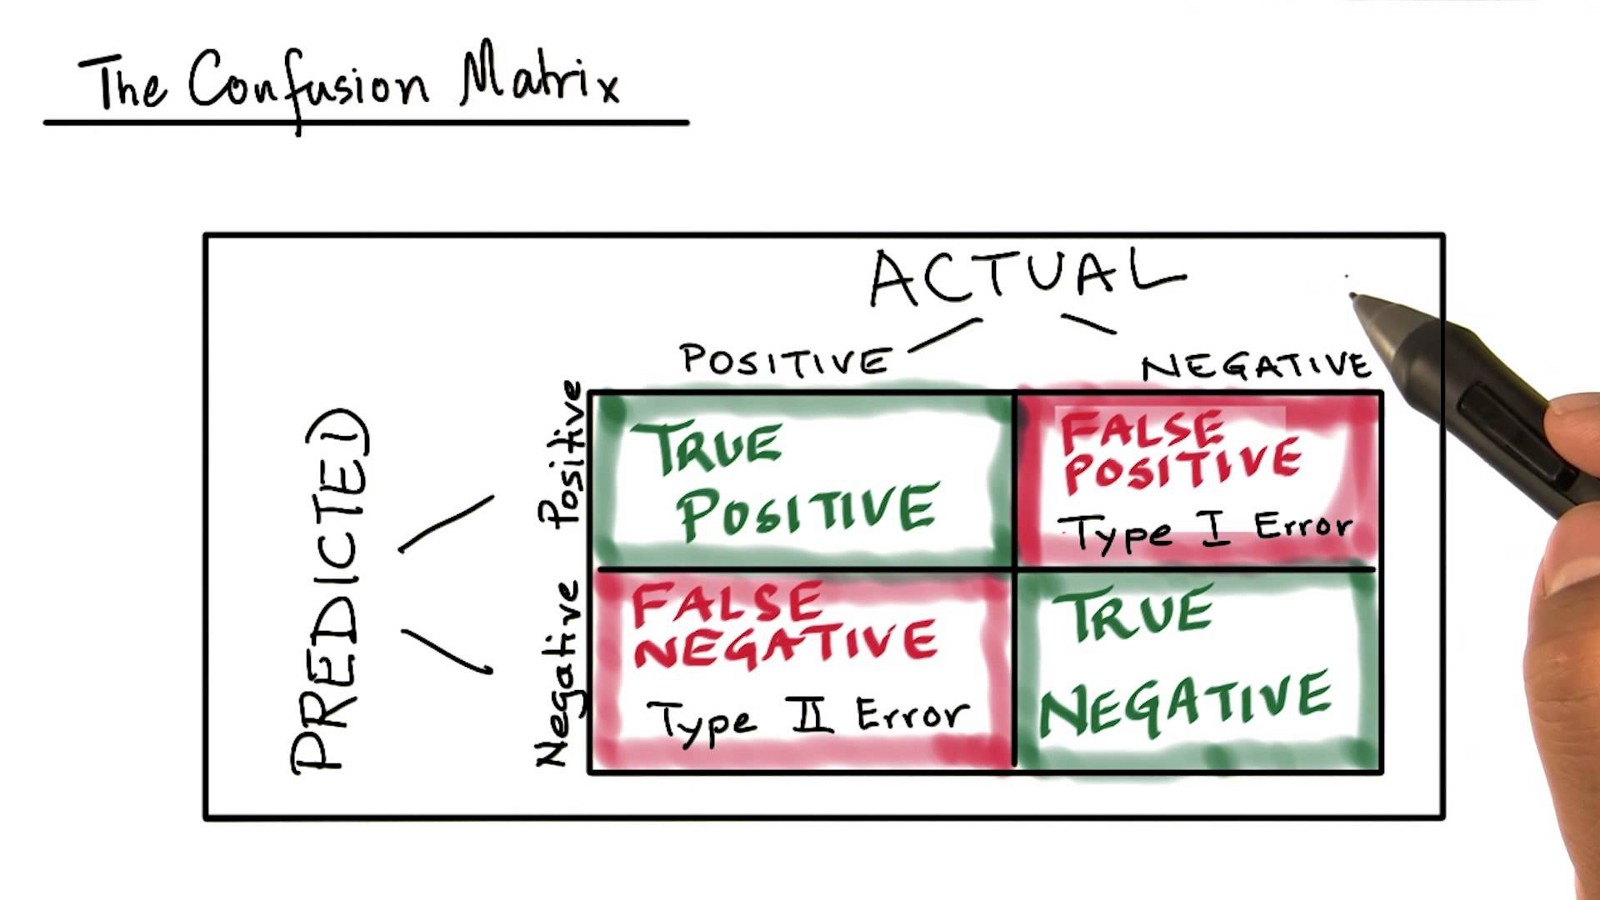


In [50]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'],margins=True)


Predicted,0,1,All
True,,,
0,142,25,167
1,35,54,89
All,177,79,256


Text(0.5, 12.5, 'Predicted label')

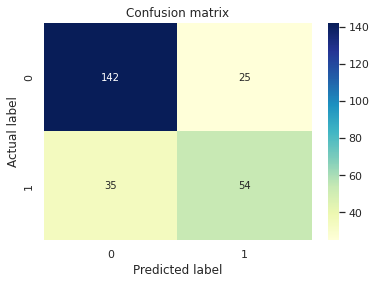

In [51]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 2. Classification Report
Report which includes Precision, Recall and F1-Scores

Precision Score
    TP – True Positives
    FP – False Positives

    Precision – Accuracy of positive predictions.
    Precision = TP/(TP + FP)

Recall Score
    FN – False Negatives

    Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
    Recall = TP/(TP+FN)

F1 Score
    F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
    F1 Score takes into account precision and the recall. 
    It is created by finding the the harmonic mean of precision and recall.

    F1 = 2 x (precision x recall)/(precision + recall)

> ***Presisi - Presisi*** adalah rasio pengamatan positif yang diprediksi dengan benar terhadap total pengamatan positif yang diprediksi. Pertanyaan yang jawabannya metrik ini adalah dari semua penumpang yang berlabel selamat, berapa sebenarnya yang selamat? Presisi tinggi berhubungan dengan tingkat positif palsu yang rendah. Kami mendapatkan presisi 0,788 yang cukup bagus.

**Precision = TP/TP+FP**

>***Recall (Sensitivity)*** Recall adalah rasio pengamatan positif yang diprediksi dengan benar terhadap semua pengamatan di kelas yang sebenarnya - ya. Jawaban dari pertanyaan yang diingat kembali adalah: Dari semua penumpang yang benar-benar selamat, berapa banyak yang kami beri label? Penarikan lebih besar dari 0,5 bagus.

**Recall = TP/TP+FN**

>*F1 Score* Skor F1 adalah rata-rata tertimbang dari Precision dan Recall. Oleh karena itu, skor ini memperhitungkan positif palsu dan negatif palsu. Secara intuitif tidak semudah memahami akurasi, tetapi F1 biasanya lebih berguna daripada akurasi, terutama jika Anda memiliki distribusi kelas yang tidak merata. Akurasi bekerja paling baik jika positif palsu dan negatif palsu memiliki biaya yang sama. Jika biaya positif palsu dan negatif palsu sangat berbeda, lebih baik melihat Presisi dan Ingatan.

F1 Score = 2(Recall Precision) / (Recall + Precision)





In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



## 3. ROC - AUC
Kurva ROC (Receiver Operating Characteristic) memberi tahu kita tentang seberapa baik model dapat membedakan antara dua hal (mis. Jika pasien memiliki penyakit atau tidak). Model yang lebih baik dapat secara akurat membedakan keduanya. Padahal, model yang buruk akan mengalami kesulitan dalam membedakan keduanya

Well Explained in this video: https://www.youtube.com/watch?v=OAl6eAyP-yo

In [54]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

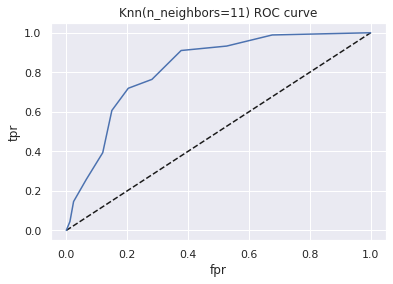

In [55]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()


In [56]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8193500639171096

### Hyper Parameter optimization
Pencarian grid adalah pendekatan untuk penyetelan hyperparameter yang secara metodis akan membangun dan mengevaluasi model untuk setiap kombinasi parameter algoritma yang ditentukan dalam grid.

> Mari kita perhatikan contoh berikut:

Misalkan, model pembelajaran mesin X mengambil hyperparameter a1, a2 dan a3. Dalam pencarian kisi, pertama-tama Anda menentukan rentang nilai untuk masing-masing hyperparameter a1, a2, dan a3. Anda dapat menganggap ini sebagai larik nilai untuk setiap hyperparameter. Sekarang teknik pencarian grid akan membangun banyak versi X dengan semua kemungkinan kombinasi nilai hyperparameter (a1, a2 dan a3) yang Anda tentukan di tempat pertama. Kisaran nilai hyperparameter ini disebut sebagai grid.

Misalkan, Anda mendefinisikan grid sebagai: a1 = [0,1,2,3,4,5] a2 = [10,20,30,40,5,60] a3 = [105,105,110,115,120,125]

Perhatikan bahwa, array nilai yang Anda tetapkan untuk hyperparameter harus sah dalam arti bahwa Anda tidak dapat menyediakan nilai tipe Floating ke array jika hyperparameter hanya mengambil nilai Integer.

Sekarang, pencarian grid akan memulai proses pembuatan beberapa versi X dengan grid yang baru saja Anda tentukan.

Ini akan dimulai dengan kombinasi [0,10,105], dan akan diakhiri dengan [5,60,125]. Ini akan melalui semua kombinasi perantara antara keduanya yang membuat pencarian grid secara komputasi sangat mahal.


In [58]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}
